In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('placement.csv')
df.sample(5)

,cgpa,placement_exam_marks,placed
336,7.93,9.0,1
740,6.21,74.0,1
728,6.63,23.0,0
543,7.48,16.0,0
633,6.63,39.0,1


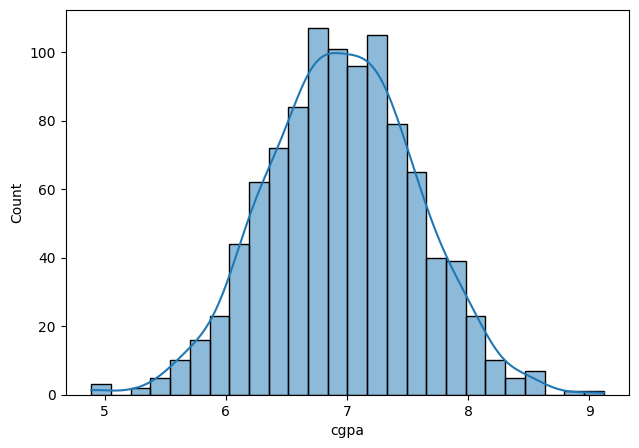

In [11]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df['cgpa'],kde=True)
plt.show()


In [10]:
cgpa_mean = df['cgpa'].mean()
cgpa_std = df['cgpa'].std()
cgpa_max = df['cgpa'].max()
cgpa_min = df['cgpa'].min()

In [16]:
min_value_range = cgpa_mean -  3 * cgpa_std
max_value_range = cgpa_mean +  3 * cgpa_std

In [17]:
print(min_value_range , "  ",max_value_range)

5.113546374602832    8.808933625397168


In [18]:
df[(df['cgpa'] > max_value_range) | (df['cgpa'] < min_value_range)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


## Treating the outliers 

# 1. Trimming

In [20]:
new_df = df[(df['cgpa']< max_value_range) & (df['cgpa'] > min_value_range)]

In [21]:
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


# 2. Capping

In [22]:
df['cgpa'] = np.where(df['cgpa']>max_value_range,max_value_range,np.where(df['cgpa']<min_value_range,min_value_range,df['cgpa']))

In [26]:
df.shape

(1000, 3)

In [27]:
df['cgpa'].describe()

count    1000.000000
mean        6.961240
std         0.615898
min         4.890000
25%         6.550000
50%         6.960000
75%         7.370000
max         9.120000
Name: cgpa, dtype: float64